In [36]:
import torch
inputs = torch.tensor(
 [[0.43, 0.15, 0.89], # Your    (x^1)
 [0.55, 0.87, 0.66], # journey  (x^2)
 [0.57, 0.85, 0.64], # starts   (x^3)
 [0.22, 0.58, 0.33], # with     
[0.77, 0.25, 0.10], # one      
[0.05, 0.80, 0.55]] # step     
)

In [37]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version PyTorch was compiled with:", torch.version.cuda)

PyTorch version: 2.8.0+cpu
CUDA available: False
CUDA version PyTorch was compiled with: None


In [38]:
# The intermediate attention scores are calculated by taking the dot product of each input vector with the query vector.
query = inputs[1]                                               
attn_scores_2 = torch.empty(inputs.shape[0])
print(attn_scores_2)
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)
print(query)

tensor([0.2961, 0.5166, 0.2517, 0.6886, 0.0740, 0.8665])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
tensor([0.5500, 0.8700, 0.6600])


In [39]:
res = 0.
for idx, element in enumerate(inputs[0]):
     res += inputs[0][idx] * query[idx]
print(res)
print(torch.dot(inputs[0], query))
print(" The outputs confirms that the sum of the element-wise multiplication gives the same results as the dot product:")

tensor(0.9544)
tensor(0.9544)
 The outputs confirms that the sum of the element-wise multiplication gives the same results as the dot product:


In [40]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version PyTorch was compiled with:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current GPU:", torch.cuda.get_device_name(0))
    print("GPU Memory:", torch.cuda.get_device_properties(0).total_memory / 1024**3, "GB")

PyTorch version: 2.8.0+cpu
CUDA available: False
CUDA version PyTorch was compiled with: None
Number of GPUs: 0


In [41]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


Query: tensor([0.5500, 0.8700, 0.6600])
Context vector is the weighted sum of the input vectors and the attention weights.
context vector initialization: tensor([0., 0., 0.])
Final context vector: tensor([0.4419, 0.6515, 0.5683])


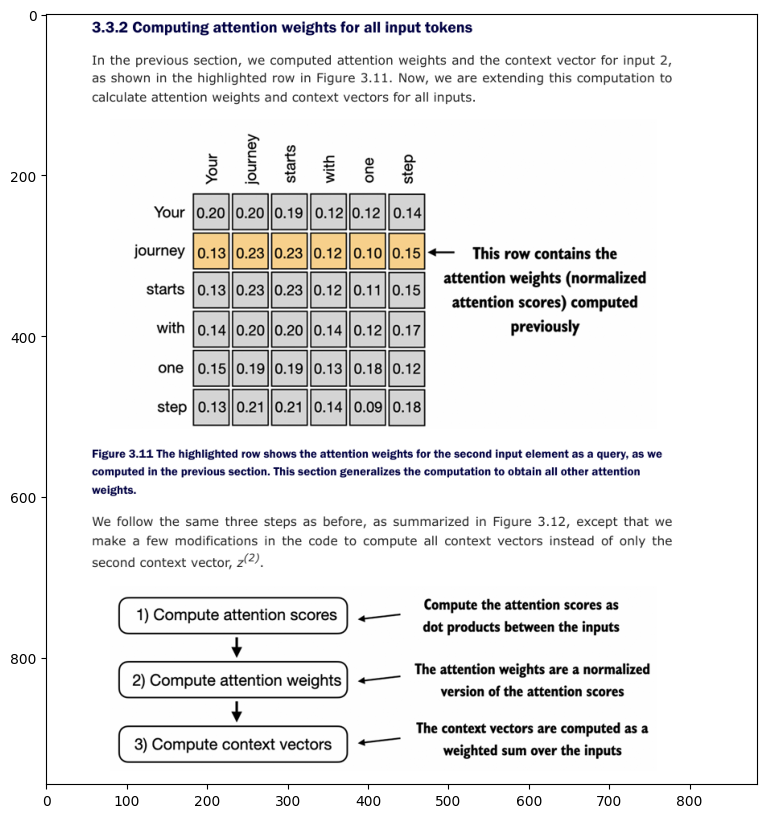

In [42]:
query = inputs[1] # 2nd input token is the query
print("Query:", query)
context_vec_2 = torch.zeros(query.shape)
print("Context vector is the weighted sum of the input vectors and the attention weights.")
print("context vector initialization:", context_vec_2)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print("Final context vector:",context_vec_2)


import matplotlib.pyplot as plt
img=plt.imread('image.png')
plt.figure(figsize=(12,10))
plt.imshow(img)

In [43]:
# Lets calculate the context vector for the entire sequence in one go.
# We can do this by matrix multiplication of the attention weights with the input matrix.


#Step1
#First lets calculate the attention scores for all queries in one go.
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
       attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

print("===="*30)
# Insted of using for loop because the for loops are slow in python so we can use matrix multiplication to calculate the attention scores for all queries in one go.
attn_scores = inputs @ inputs.T
print(attn_scores)
print("We can visually confirm that both methods give the same results.")

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
We can visually confirm that both methods give the same results.


In [44]:
#Step2
#Lets now normalize the attention scores using softmax.
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)
print("By setting dim=-1, we are instructing the softmax function to apply the normalization along the last dimension of the attn_scores tensor.")

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
By setting dim=-1, we are instructing the softmax function to apply the normalization along the last dimension of the attn_scores tensor.


In [45]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))
print("We can see that all row sums equal 1, confirming that the attention weights are properly normalized.")

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
We can see that all row sums equal 1, confirming that the attention weights are properly normalized.


In [46]:
inputs.shape, attn_weights.shape
print("The input matrix has shape:", inputs.shape)
print("The attention weights matrix has shape:", attn_weights.shape)
print("The resulting context vector matrix will have shape (6, 3), matching the input matrix shape.")

The input matrix has shape: torch.Size([6, 3])
The attention weights matrix has shape: torch.Size([6, 6])
The resulting context vector matrix will have shape (6, 3), matching the input matrix shape.


In [47]:
print("Got the final self attention context vectors by multiplying the attention weights with the input matrix:")
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)


Got the final self attention context vectors by multiplying the attention weights with the input matrix:
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


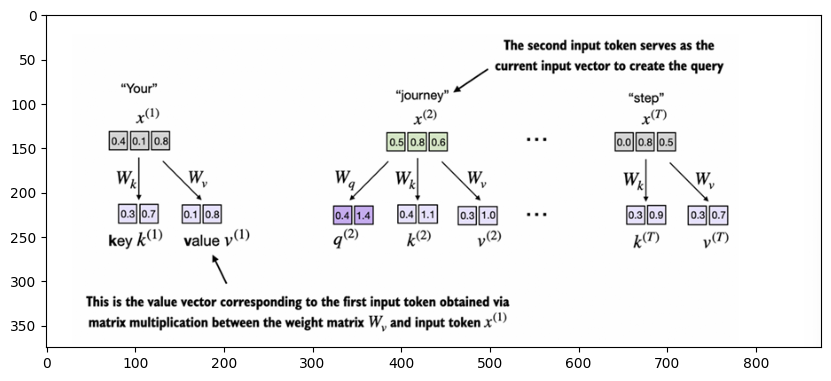

In [48]:
"""
In the next section,
we will add trainable weights, enabling the LLM to learn from data and improve its performance on specific tasks.
Basically extending the attention mechanism to include learnable parameters.


The most notable difference is the introduction of weight matrices that are updated
 during model training. These trainable weight matrices are crucial so that the model
 (specifically, the attention module inside the model) can learn to produce "good" context
 vectors.
"""

# We will implement the self-attention mechanism step by step by introducing the three
#  trainable weight matrices Wq, Wk, and Wv. These three matrices are used to project the
#  embedded input tokens, x(i), into query, key, and value vectors 

img = plt.imread('image2.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)


🔑 In Attention (like in Transformers)

For each input token (word, pixel, etc.), the model creates three vectors:

Query (Q)

Key (K)

Value (V)

They are all just different learned projections of the same input embedding.

Imagine you are reading a sentence and want to see which words are relevant to a particular word.

Query — represents what this word is looking for (what information it needs)

Key — represents what this word contains (what information it offers)

Value — represents the actual content of this word (what information will be passed on if chosen)

In [49]:
"""
What is a Query?

The query is a vector that represents what the current token is "looking for" in other tokens.

It captures the information need of the current token.

For example, if the current token is "journey", its query vector q^(2) encodes: 
"what kind of information am I seeking from the other tokens (like 'your', 'step' etc.)?" 

Key Points about Queries:
- Each token has its own query vector
- The query determines what information that token wants to gather
- Queries are compared against keys to compute attention scores
- Higher attention scores mean the query finds that information more relevant
- This allows tokens to selectively focus on relevant context from other tokens

In our example:
- inputs[1] = [0.55, 0.87, 0.66] represents "journey" 
- This becomes the query vector when we want to compute attention for the "journey" token
- The query asks: "What context should I pay attention to?"
"""

# Example: Let's see how the query "journey" attends to different tokens
print("Query token (journey):", inputs[1])
print("Attention scores with all tokens:", attn_scores_2)
print("Normalized attention weights:", attn_weights_2)
print("\nThis shows how much 'journey' pays attention to each token:")
tokens = ["Your", "journey", "starts", "with", "one", "step"]
for i, (token, weight) in enumerate(zip(tokens, attn_weights_2)):
    print(f"  {token}: {weight.item():.4f}")

Query token (journey): tensor([0.5500, 0.8700, 0.6600])
Attention scores with all tokens: tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Normalized attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

This shows how much 'journey' pays attention to each token:
  Your: 0.1385
  journey: 0.2379
  starts: 0.2333
  with: 0.1240
  one: 0.1082
  step: 0.1581


In [50]:
x_2 = inputs[1]                                                   
d_in = inputs.shape[1]                                            
d_out = 2                                                         
#A The second input element
#B The input embedding size, d=3
#C The output embedding size, d_out=2

In [51]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
"""
when : requires_grad=False
→ PyTorch will not track gradients for this tensor.
→ It will be treated as just fixed data.
→ It will not be updated during training.
"""

'\nwhen : requires_grad=False\n→ PyTorch will not track gradients for this tensor.\n→ It will be treated as just fixed data.\n→ It will not be updated during training.\n'

In [52]:
print(f"Wq: {W_query}")
print(f"Wk: {W_key}")
print(f"Wv: {W_value}")

Wq: Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Wk: Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Wv: Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [53]:
 # these are the direct matrix multiplications to get the query, key and value vectors
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [54]:
keys=inputs @ W_key
values=inputs @ W_value
print("keys.shape :", keys.shape)
print("values.shape :", values.shape)
print("As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space:")

keys.shape : torch.Size([6, 2])
values.shape : torch.Size([6, 2])
As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space:


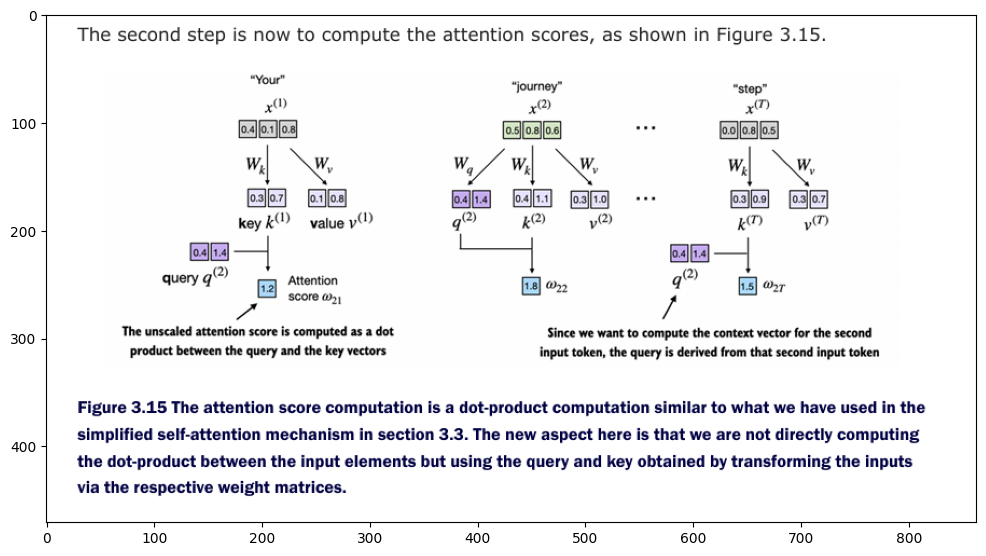

In [55]:
img=plt.imread("images/image copy.png")
plt.figure(figsize=(12,10))
plt.imshow(img)

attn_score_22=Q2​⋅K2​
tensor(1.8524)


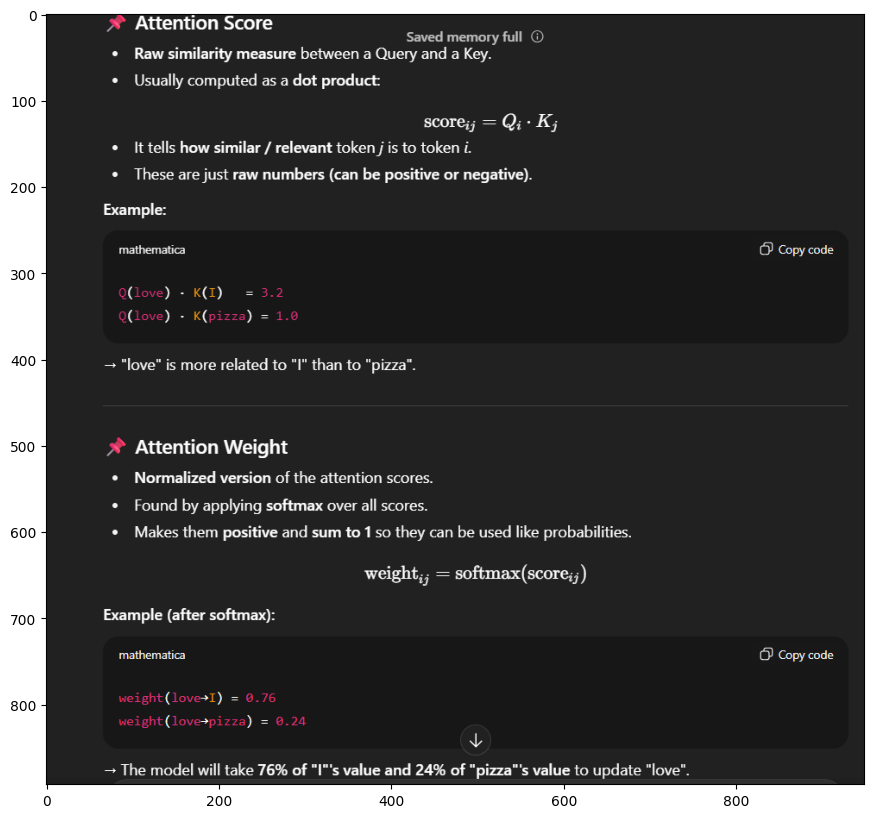

In [56]:
# The second step is now to compute the attention scores
#This keys_2 is the key of the second token "journey"
keys_2=keys[1]
print("attn_score_22=Q2​⋅K2​")
attn_score_22=query_2.dot(keys_2)
print(attn_score_22)
img2=plt.imread("images\image.png")
plt.figure(figsize=(12,10))
plt.imshow(img2)

In [57]:
attn_scores_2 = query_2 @ keys.T # All attention scores for given query with all keys of all tokens
print(attn_scores_2)
# Now as we have calculated the attention scores for the query of the second token "journey"
# with all keys of all tokens, we can now normalize these attention scores using softmax to get the attention weights.


tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


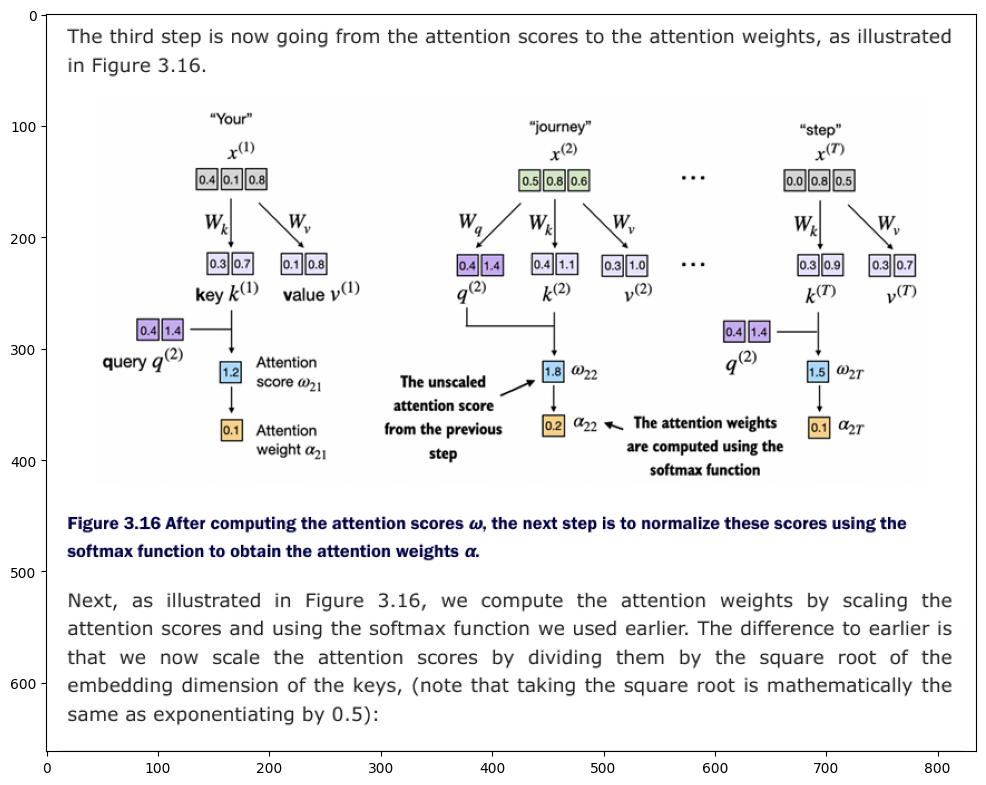

In [58]:
img3=plt.imread("images\Screenshot 2025-09-18 154203.png")
plt.figure(figsize=(12,10))
plt.imshow(img3)

In [59]:
#Lets get the attention weights by normalizing the attention scores using softmax
d_k=keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [61]:
# Now to get the final context vector we have to multiply this attention weight to t
context_vec_2 = attn_weights_2 @ values
print("Context Vector 2:", context_vec_2)

Context Vector 2: tensor([0.3061, 0.8210])


In [ ]:
import torch.nn as nn
class SelfAttention_V1(nn.Module):
    def __init__(self,d_in,d_out):
        super(SelfAttention_V1,self).__init__()
        self.d_out=d_out
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    
    def forward(self,inputs):
        keys=inputs @ self.W_key
        queries=inputs @ self.W_query
        values=inputs @ self.W_value
        attn_scores = queries @ keys.T
        attn_weights= torch.softmax(attn_scores / self.d_out**0.5, dim=-1)
        context_vecs = attn_weights @ values
        return context_vecs


In [65]:
torch.manual_seed(123)
sa_v1=SelfAttention_V1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [68]:
# We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's
#  nn.Linear layers, which effectively perform matrix multiplication when the bias units are
#  disabled. Additionally, a significant advantage of using nn.Linear instead of manually
#  implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight
#  initialization scheme, contributing to more stable and effective model training.

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values
        return context_vec

In [ ]:
torch.manual_seed(789)
sa_v2=SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))
# Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they
#  use different initial weights for the weight matrices since nn.Linear uses a more
#  sophisticated weight initialization scheme.

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
